### Assignment-Computer Vision Fall2020

#### Importing Libraries

In [2]:
import numpy as np
import cv2
from PIL import Image
import PIL as plw
import matplotlib.pyplot as plt

#### Read Source Image

In [3]:
source=cv2.imread('Source.jpg')
source.shape

(990, 990, 3)

#### Convert it Into RGB

In [4]:
RGB_src=cv2.cvtColor(source,cv2.COLOR_BGR2RGB)
# RGB_src.shape

#### Taking Inputs

In [5]:
N=input("Enter Number of Gallery Images :")
M=input("Enter Number of Query Images :")
m=input("Enter Height of Image :")
n=input("Enter Width of Image :")

Enter Number of Gallery Images :5
Enter Number of Query Images :5
Enter Height of Image :300
Enter Width of Image :300


#### Croping and Saving Images in Gallery Folder

In [6]:
def crop(image, height, width):
    max_x = image.shape[1] - width
    max_y = image.shape[0] - height
    x = np.random.randint(0, max_x)
    y = np.random.randint(0, max_y)
    crop = image[y: y + height, x: x + width]
    return crop
for i in range(0,int(N)):
    patch=crop(RGB_src,int(m),int(n))
    plt.imsave('Gallery/image'+str(i)+'.jpg',patch)

#### Croping and Saving Images in Query Folder

In [7]:
def crop(image, height, width):
    max_x = image.shape[1] - width
    max_y = image.shape[0] - height
    x = np.random.randint(0, max_x)
    y = np.random.randint(0, max_y)
    crop = image[y: y + height, x: x + width]
    return crop
for i in range(0,int(M)):
    patch=crop(RGB_src,int(m),int(n))
    plt.imsave('Query/Qimage'+str(i)+'.jpg',patch)

#### Function to Compute SSD

In [8]:
def RGB_SSD(im1, im2):
    height, width, _ = im1.shape
    dist_array = []
    image_diff = im1-im2
    for h in range(height):
        for w in range(width):
            dist_array.append(np.sum(image_diff[h][w]**2))
            
    SSD = sum(np.array(dist_array)**2)
    return SSD

#### Reading and Comparing Image 

In [33]:
rows, cols = (int(M), int(N)) 
Q_DIST = [] 
for i in range(0,int(M)):
    G_DIST=[]
    Q_BRG=cv2.imread('Query/Qimage'+str(i)+'.jpg')
    for j in range(0,int(N)):
        G_BRG=cv2.imread('Gallery/image'+str(j)+'.jpg')
        G_DIST.append(RGB_SSD(Q_BRG, G_BRG))
    Q_DIST.append(G_DIST)    

#### Printing the 2D Distance Matrix

In [10]:
print(Q_DIST)

[[10184412880, 10532048674, 10774987567, 10971386644, 10498252559], [10892468124, 10531051002, 10902786347, 10979805992, 9085528949], [10378149438, 10743826752, 10366416799, 10791536702, 10528418475], [10824968466, 10697387760, 10800363919, 10782230112, 10735737555], [10658701767, 10461614181, 10844915910, 10763802451, 10072620270]]


#### Finding the Best Matching Image in Gallery For Every Query Image

In [24]:
list_index=[]
for query_dist in Q_DIST:
    list_index.append(np.argmin(query_dist))
print(list_index)

[0, 4, 2, 1, 4]


#### Ploting The Pairs Of Images

10184412880
9085528949
10366416799
10697387760
10072620270


<Figure size 432x288 with 0 Axes>

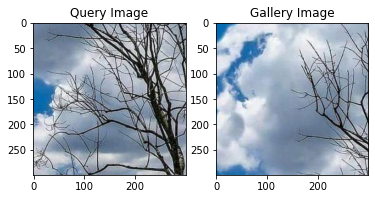

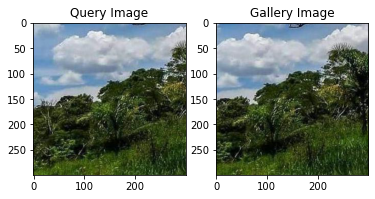

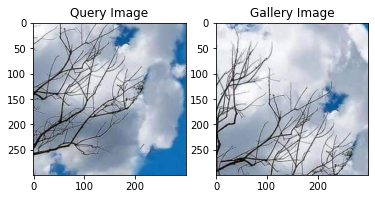

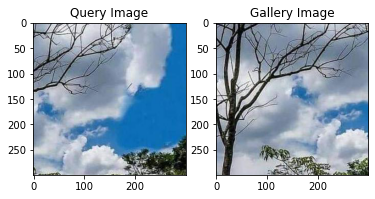

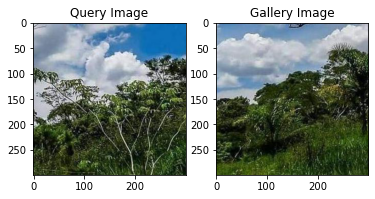

In [32]:
i=0
fig = plt.figure()
for cord in list_index:
    fig = plt.figure()
    Q_img=cv2.imread('Query/Qimage'+str(i)+'.jpg')
    Q_img_RGB=cv2.cvtColor(Q_img,cv2.COLOR_BGR2RGB)
    G_img=cv2.imread('Gallery/image'+str(cord)+'.jpg')
    G_img_RGB=cv2.cvtColor(G_img,cv2.COLOR_BGR2RGB)
    print(Q_DIST[i][cord])
    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(Q_img_RGB)
    ax1.set_title('Query Image')
    ax2 = fig.add_subplot(1,2,2)
    ax2.imshow(G_img_RGB)
    ax2.set_title('Gallery Image')
    i+=1